# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
nltk.download('punkt')
import pickle
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_1 = pd.read_csv("C:/Users/HP/Downloads/Fake News APP/True.csv")
df_1['label'] = 1
df_0 = pd.read_csv("C:/Users/HP/Downloads/Fake News APP/Fake.csv")
df_0['label'] = 0

In [3]:
df = pd.concat([df_1, df_0])

In [4]:
df.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [5]:
df.shape

(44898, 5)

In [6]:
df.describe()

label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [7]:
df.duplicated().sum()

209

In [8]:
# drop duplicated values from the dataset

df.drop_duplicates(inplace = True)

In [9]:
#check whether there are 'nan' values

df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [10]:
#look class frequencies of 'subject' variable

df["subject"].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
#the number of the texts

df["title"].count()

44689

In [12]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [13]:
df.tail()

title  \
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  label  
23476  January 16, 2016      0  
23477  January 16, 2016      0  
23478  January 15, 2016      0  
23479  January 14, 2016      0  
23480  January 12, 2016      0

# DATA VISUALIZATION

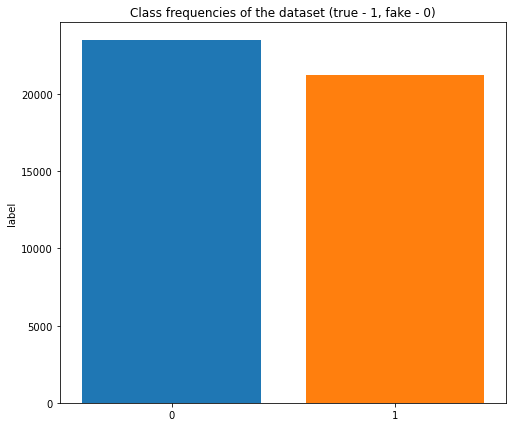

In [14]:
plt.figure(figsize = [8, 7], clear = True, facecolor = 'white')

sns.barplot(x = df["label"].value_counts().index,
            y = df["label"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

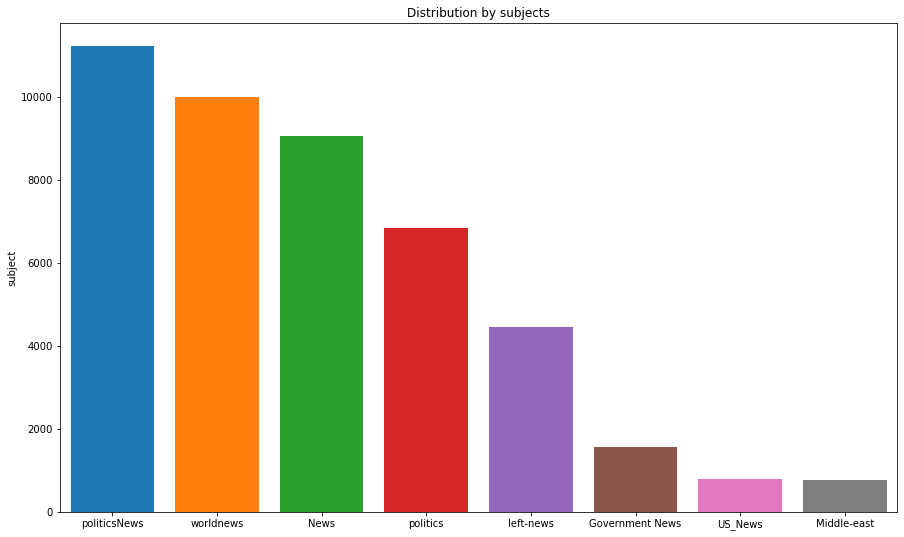

In [15]:
plt.figure(figsize = [15, 9], clear = True, facecolor = 'white')
sns.barplot(x = df["subject"].value_counts().index,
            y = df["subject"].value_counts(),
            saturation = 1).set(title = "Distribution by subjects");

In [16]:
fig = px.pie(df, names = "subject", title = "Percentage of subject attribute", hole = 0.3,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

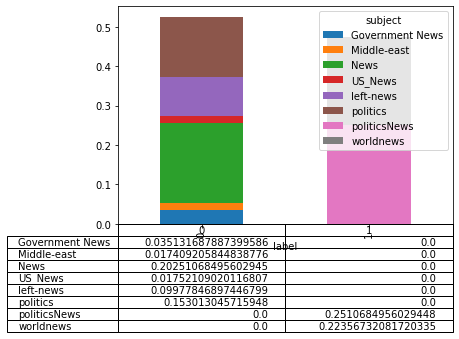

In [17]:
pd.crosstab(df["label"], df["subject"], 
            normalize = True).plot(kind = "bar", 
                                   backend = "matplotlib",
                                   legend = True, table = True, stacked = True);

From the above Politics News and World News are the only true news, while the other subjects all report fake news.

<function matplotlib.pyplot.show(close=None, block=None)>

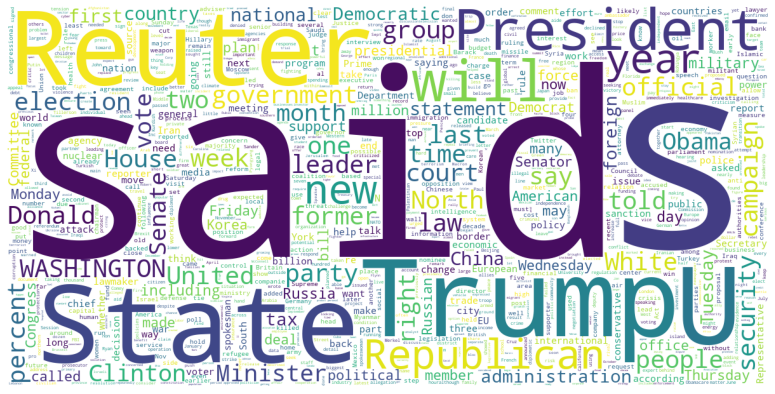

In [18]:
#Wordcloud for true news

text = " ".join(i for i in df_1.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

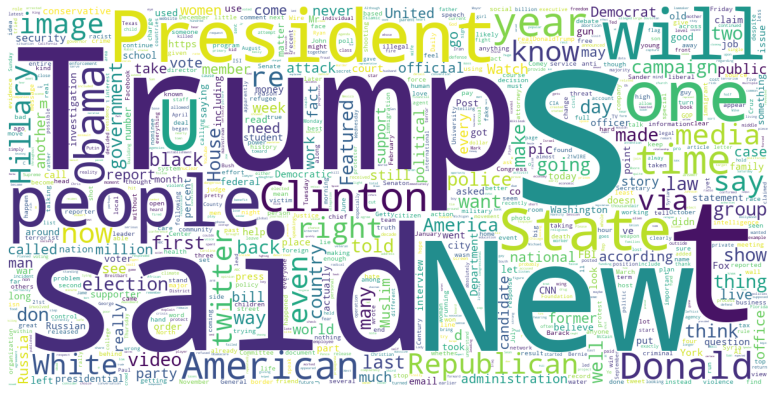

In [19]:
#Wordcloud for fake news

text = " ".join(i for i in df_0.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

D:\New folder\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning:

Mean of empty slice.

D:\New folder\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning:

invalid value encountered in double_scalars

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'T R U E   N E W S')

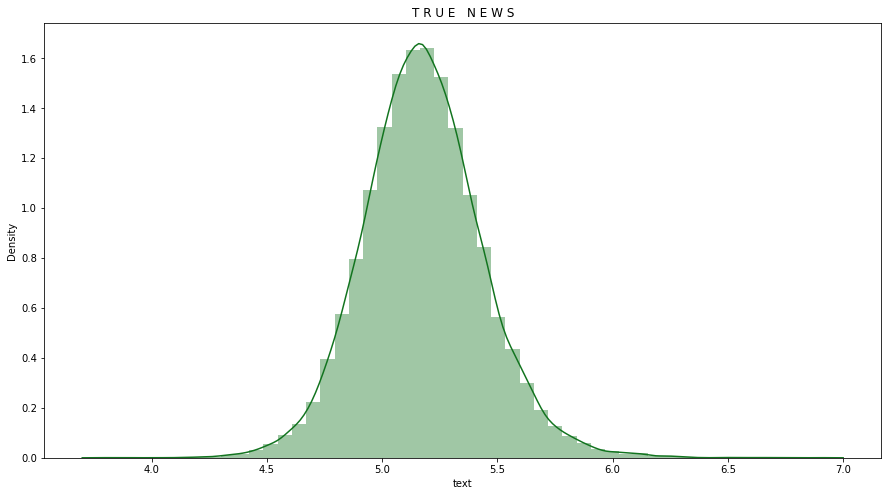

In [20]:
#average word length in true news

fig,ax = plt.subplots(figsize = (15, 8))
text_words = df[df["label"] == 1]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#12741F", ax = ax).set_title("T R U E   N E W S")

D:\New folder\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning:

Mean of empty slice.

D:\New folder\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning:

invalid value encountered in double_scalars

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



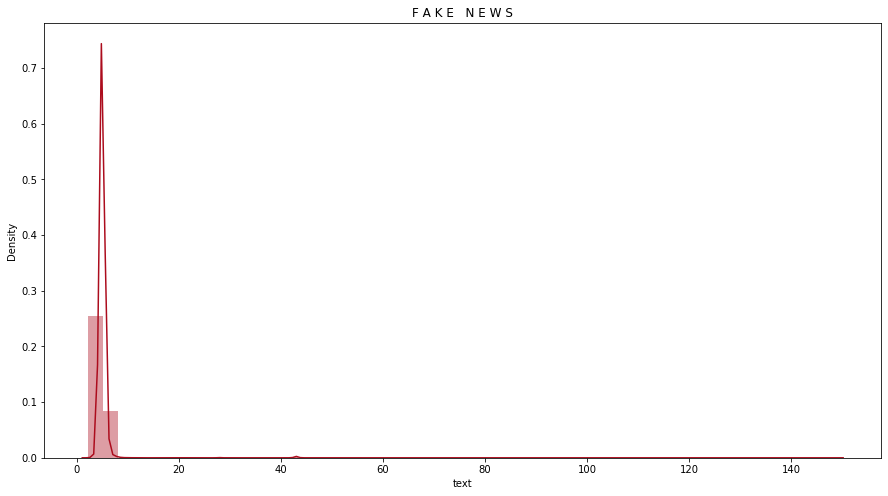

In [21]:
#average word length in fake news

fig, ax = plt.subplots(figsize = (15, 8))
text_words = df[df["label"] == 0]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#AC0C1D", ax = ax).set_title("F A K E   N E W S");

# Preprocessing title

In [22]:
content = df['title']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer()
feature_vector =  count_vectorize.fit(content)
features = feature_vector.get_feature_names()
print("total number of features: ", len(features))

total number of features:  20896


D:\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [24]:
train_ds_features = count_vectorize.transform(content)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [25]:
train_ds_features.getnnz()

544401

In [26]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.05829819627682445


In [27]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
content[0:1]

0    As U.S. budget fight looms, Republicans flip t...
Name: title, dtype: object

In [28]:
count_vectorizer =  CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(content)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(content)
features_counts =  np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

features  counts
881       to   17251
896    trump   14856
416       in    9330
930    video    8505
603       of    8157
318      for    7581
611       on    6988
859      the    6842
47       and    4281
975     with    3965
752     says    3523
431       is    3257
601    obama    3244
24     after    2569
390  hillary    2364

In [29]:
most_frequent = features_counts['features'].values.tolist()

In [30]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['top', 'etc', 'of', 'between', 'cannot', 'itself', 'see', 'namely', 'onto', 'whose']


In [31]:
clean_content = []
for content_text in content:
    text_tokens = word_tokenize(content_text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in my_stop_words and word.lower() in most_frequent]
    new_content = ' '.join(tokens_without_sw)
    clean_content.append(new_content)

In [32]:
lens = [len(content) for content in clean_content]
sum(lens)/len(clean_content)

31.66139318400501

In [33]:
df['title_clean'] = clean_content

# Preprocessing content

In [34]:
content = df['text']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer()
feature_vector =  count_vectorize.fit(content)
features = feature_vector.get_feature_names()
print("total number of features: ", len(features))

total number of features:  122002


D:\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [36]:
train_ds_features = count_vectorize.transform(content)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [37]:
train_ds_features.getnnz()

9347611

In [38]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.1714482451028124


In [39]:
# train_ds_df = pd.DataFrame(train_ds_features.todense())
# train_ds_df.columns = features
# content[0:1]

In [40]:
count_vectorizer =  CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(content)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(content)
features_counts =  np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

features   counts
864      the  1020104
889       to   533606
608       of   439482
71       and   406890
424       in   350573
863     that   238893
618       on   190807
331      for   172454
447       is   166074
903    trump   133398
386       he   132697
455       it   132322
755     said   131629
978     with   117290
945      was   115180

In [41]:
most_frequent = features_counts['features'].values.tolist()

In [42]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['top', 'etc', 'of', 'between', 'cannot', 'itself', 'see', 'namely', 'onto', 'whose']


In [43]:
clean_content = []
for content_text in content:
    text_tokens = word_tokenize(content_text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in my_stop_words and word.lower() in most_frequent]
    new_content = ' '.join(tokens_without_sw)
    clean_content.append(new_content)

In [44]:
lens = [len(content) for content in clean_content]
sum(lens)/len(clean_content)

699.5478081854595

In [45]:
df['text_clean'] = clean_content

In [46]:
df.to_csv('./data.csv')

# TF_IDF

In [47]:
df.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6  WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   

                 date  label                                      title_clean  \
0  December 31, 2017       1                         budget fight Republicans   
1  December 29, 2017       1                    military transgender Pentagon   
2  December 31, 2017       1            Senior Republican senator Mueller job   
3  December 30, 2017       1                                 FBI Russia probe   
4  December 29, 2017       1                              Trump wants Service   
5  December 29, 2017       1  White House Congress talks spending immigration   
6  December 29, 2017       1                          Trump says Russia probe   
7  December 29, 2017       1                            Factbox Trump Twitter   
8  December 29, 2017       1                             Trump Twitter Global   
9  December 28, 2017       1     Alabama official today despite challenge CNN   

                                          text_clean  
0  WASHINGTON Reuters head conservative Republica...  
1  WASHINGTON Reuters people allowed time militar...  
2  WASHINGTON Reuters special investigation Russi...  
3  WASHINGTON Reuters Trump campaign adviser Geor...  
4  Reuters President Donald Trump called Service ...  
5  WEST Reuters White House said Friday set talks...  
6  WEST Reuters President Donald Trump said Thurs...  
7  following posted Twitter President Donald Trum...  
8  following posted Twitter President Donald Trum...  
9  WASHINGTON Reuters Secretary State John said D...

In [48]:
df = pd.read_csv('./data.csv')

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['title'] + df['text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'émigré', 'état', 'žižek'], dtype=object)

In [50]:
with open('vectorizer.pk', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [51]:
feature_size = len(vectorizer.get_feature_names_out())

In [52]:
feature_size

140577

In [53]:
y = df['label']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Classifiers

In [55]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [56]:
def get_metrics(y_true, y_pred):
    np.set_printoptions(suppress=True)
    ac_sc = accuracy_score(y_true, y_pred)
    print(f'Accuracy score: {ac_sc}', )
    print(f'F1-score: {f1_score(y_true, y_pred)}', )
    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### Classification using Xgboost

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

In [60]:
filename = f'./models/xgboost.pkl'
pickle.dump(xgb_cl, open(filename, 'wb'))

Accuracy score: 0.9979861266502573
F1-score: 0.9978853383458647


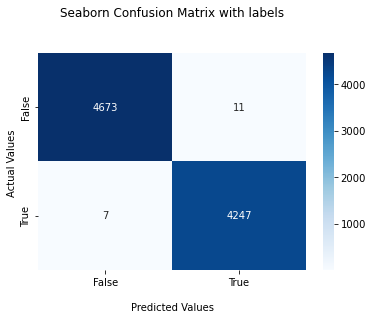

In [61]:
get_metrics(y_test, preds)

### Classification using LSVM

In [62]:
svm_clf = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
svm_clf.fit(X=X_train, y=y_train)

[LibSVM]

D:\New folder\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=1, gamma='auto', kernel='linear', max_iter=1000, verbose=True)

In [63]:
filename = f'./models/lsvm.pkl'
pickle.dump(xgb_cl, open(filename, 'wb'))

In [64]:
pred = svm_clf.predict(X_test)

Accuracy score: 0.9979861266502573
F1-score: 0.9978853383458647


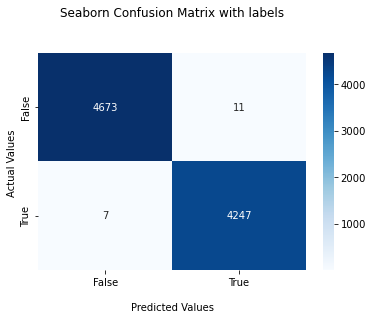

In [65]:
get_metrics(y_test, preds)

### Classification using Linear Regression

In [66]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

In [67]:
filename = f'./models/linear_regression.pkl'
pickle.dump(reg, open(filename, 'wb'))

Accuracy score: 0.9979861266502573
F1-score: 0.9978853383458647


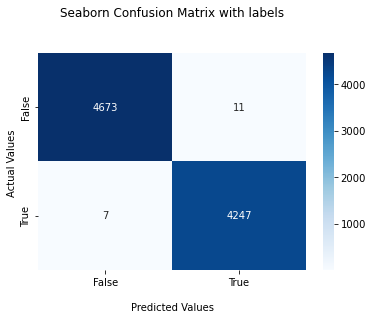

In [68]:
get_metrics(y_test, preds)

### Classification using KNN

In [69]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
filename = f'./models/knn.pkl'
pickle.dump(neigh, open(filename, 'wb'))

In [71]:
pred = neigh.predict(X_test)

Accuracy score: 0.877153725665697
F1-score: 0.8769610040340655


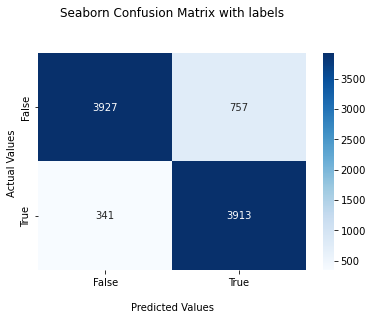

In [72]:
get_metrics(y_test, pred)

### Classification using Naive Bayes

Accuracy score: 0.9395837995077199
F1-score: 0.9354530241453503


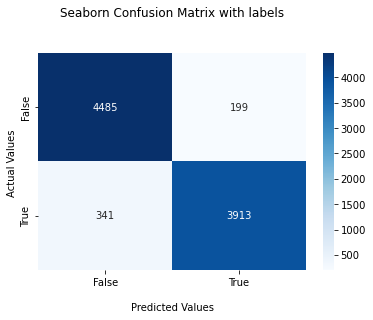

In [73]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
get_metrics(y_test, pred)

In [74]:
filename = f'./models/bayes.pkl'
pickle.dump(clf, open(filename, 'wb'))

### Classification using Decision tree

Accuracy score: 0.9960841351532781
F1-score: 0.9958886409021496


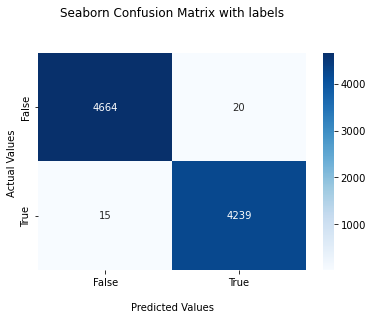

In [75]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
get_metrics(y_test, pred)

In [76]:
filename = f'./models/decision_tree.pkl'
pickle.dump(clf, open(filename, 'wb'))

### Classification using SVM

In [77]:
svm_clf = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
svm_clf.fit(X=X_train, y=y_train)

[LibSVM]

D:\New folder\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=1, gamma='auto', max_iter=1000, verbose=True)

In [78]:
filename = f'./models/svm.pkl'
pickle.dump(svm_clf, open(filename, 'wb'))

In [79]:
pred = svm_clf.predict(X_test)

Accuracy score: 0.9979861266502573
F1-score: 0.9978853383458647


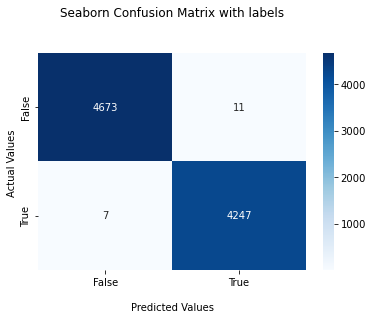

In [80]:
get_metrics(y_test, preds)

## Classification using LSTM

In [81]:
import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

### TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['title'] + df['text']
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names_out()

In [83]:
with open('./vectorizer_nn.pkl', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [84]:
feature_size = len(vectorizer.get_feature_names_out())

In [85]:
feature_size

1000

In [86]:
y = df['label']
y = y[:5000]

In [87]:
X_tf = X.toarray()[:5000]  #//shape - (3,6)
# y = y.toarray() #//shape - (3,6)
X_tf = X_tf[:, :, None] #//shape - (3,6,1) 
# y = y[:, :, None] #//shape - (3,6,1)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.2, random_state=0)

In [89]:
X_train.shape

(4000, 1000, 1)

In [90]:
model = Sequential()

model.add(LSTM(units = 128,
               return_sequences = True,
               recurrent_dropout = 0.3,
               dropout = 0.3))

model.add(LSTM(units = 64,
               recurrent_dropout = 0.15,
               dropout = 0.15))

model.add(Dense(units = 32,
                activation = "relu"))

model.add(Dense(1,
                activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [91]:
model.fit(X_train, y_train, batch_size=128, epochs=1)

32/32 [==============================] - 702s 22s/step - loss: 0.0471 - accuracy: 0.9805


In [92]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


In [93]:
model_load = keras.models.load_model('./mymodel/')

In [94]:
print("Model accuracy on the train set: ", model.evaluate(X_train, y_train)[1])
print("Model accuracy on the test set: ", model.evaluate(X_test, y_test)[1])

125/125 [==============================] - 57s 448ms/step - loss: 3.6272e-09 - accuracy: 1.0000
Model accuracy on the train set:  1.0
32/32 [==============================] - 17s 524ms/step - loss: 3.6272e-09 - accuracy: 1.0000
Model accuracy on the test set:  1.0


32/32 [==============================] - 17s 499ms/step
Accuracy score: 1.0
F1-score: 1.0


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

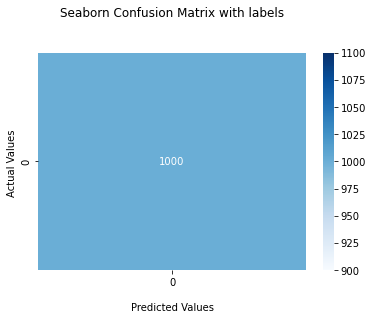

In [95]:
pred = model_load.predict(X_test)
get_metrics(y_test, pred)